# <p style="text-align: center;">Representaciones gráficas de datos</p>
## <p style="text-align: center;">Ejercicios con Matplotlib (y Pandas)</p>



In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math


1) Escribe una función que reciba un dataframe de Pandas con los ingresos y gastos 
de una empresa por meses durante un año, y devuelva un diagrama de líneas con 
dos líneas, una para los ingresos y otra para los gastos. El diagrama debe tener una 
leyenda identificando la línea de los ingresos y la de los gastos, un título con el 
nombre “Evolución de ingresos y gastos” y el eje y debe empezar en 0. Genera datos 
aleatorios para probar el funcionamiento.

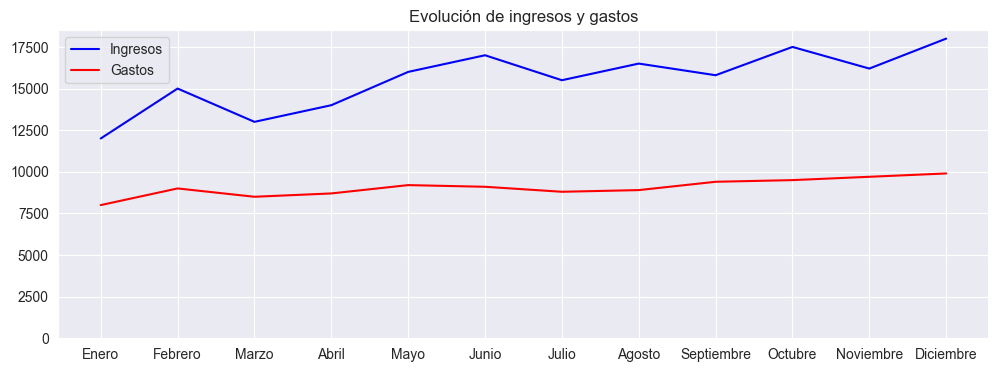

In [30]:
data = {
    "Mes": ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],
    "Ingresos": [12000, 15000, 13000, 14000, 16000, 17000, 15500, 16500, 15800, 17500, 16200, 18000],
    "Gastos": [8000, 9000, 8500, 8700, 9200, 9100, 8800, 8900, 9400, 9500, 9700, 9900]
}
datos = pd.DataFrame(data)
def ingresosYGastos(datos):
    meses = datos['Mes']
    ingresos = datos['Ingresos']
    gastos = datos['Gastos']
    plt.figure(figsize=(12, 4))
    plt.plot(meses, ingresos, color='blue', label='Ingresos')
    plt.plot(meses, gastos, color='red', label='Gastos')
    plt.legend(['Ingresos', 'Gastos'], loc='upper left')
    plt.title("Evolución de ingresos y gastos")
    plt.grid(True)  
    plt.ylim(0)
    plt.show()
    
ingresosYGastos(datos)
    
    

2) Escribe una función que reciba una **serie** de Pandas con las notas de los alumnos 
de un módulo cualquiera (generadas aleatoriamente o inventadas) y devuelva un 
diagrama de caja. El diagrama debe tener el título “Distribución de notas”. Luego 
debes conseguir pasarle un dataframe con las notas de 4 módulos diferentes y, en
la misma zona, mostrar las cajas de la distribución de los 4 módulos.

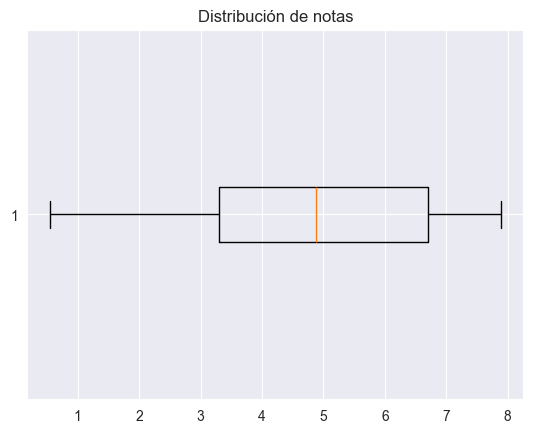

In [31]:
np.random.seed(40)
nombres_alumnos = ["Ana", "Luis", "Carlos", "María", "Jorge", "Sofía", "Pedro", "Elena", "Manuel", "Clara"]
notas = np.random.uniform(0, 10, len(nombres_alumnos))  

serie_notas = pd.Series(data=notas, index=nombres_alumnos, name="Notas del Módulo")

serie_notas = serie_notas.round(2)

def notasAlumno(serie_notas):
    if isinstance(serie_notas, (pd.DataFrame, pd.Series)):
        plt.boxplot(serie_notas, vert=False)
        plt.title("Distribución de notas")
        plt.show()
    
    
notasAlumno(serie_notas)

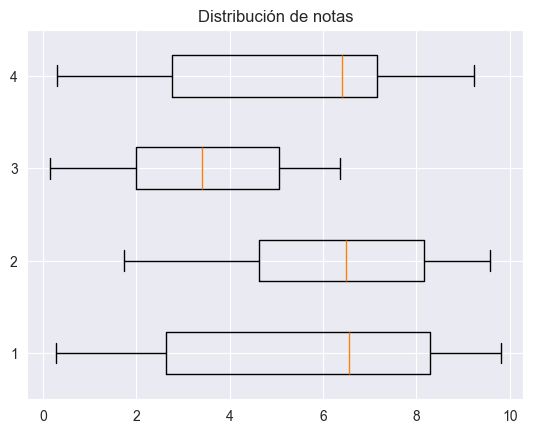

In [32]:
nombres_alumnos = ["Ana", "Luis", "Carlos", "María", "Jorge", "Sofía", "Pedro", "Elena", "Manuel", "Clara"]
modulos = ["Matemáticas", "Historia", "Física", "Química"]

# Generar un DataFrame con notas aleatorias entre 0 y 10
notas = {modulo: np.random.uniform(0, 10, len(nombres_alumnos)) for modulo in modulos}

# Crear el DataFrame
df_notas = pd.DataFrame(notas, index=nombres_alumnos)

# Redondear las notas a 2 decimales
df_notas = df_notas.round(2)

def notasAlumno4Modulos(df_notas):
    plt.boxplot(df_notas, vert=False)
    plt.title("Distribución de notas")
    plt.show() 

notasAlumno(df_notas)

3) Dispones de datos sobre las edades de pacientes en un estudio de predicción de 
enfermedades cardíacas, para ello debes generar un conjunto de datos simulado 
con 500 edades entre 20 y 80 años, siguiendo una distribución normal. Crea un 
histograma para visualizar la distribución de las edades e identifica posibles sesgos, 
si los hay. Ponle un formato visualmente más agradable que el estándar.

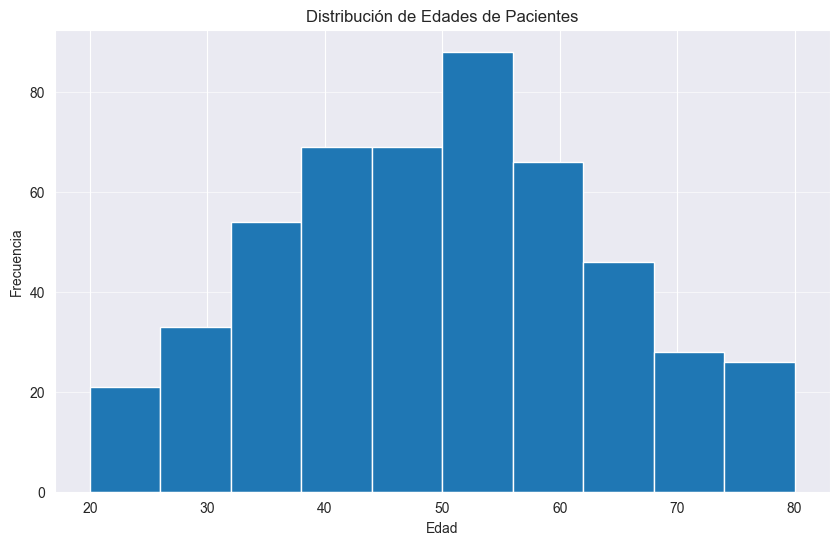

In [33]:
np.random.seed(42)  
edades_normales = np.random.normal(loc=50, scale=15, size=500)  
edades_normales = np.clip(edades_normales, 20, 80).astype(int)  # clip hace que si hay edades desorbitadas se normalizen

df = pd.DataFrame(edades_normales, columns=["Edad"])

# Crear un histograma con formato visual mejorado
plt.figure(figsize=(10, 6))
plt.hist(df["Edad"], bins=10, edgecolor="white")
plt.title("Distribución de Edades de Pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis="y", alpha=0.6)

plt.show()

4) El fichero titanic.csv contiene información sobre los pasajeros del Titanic. Vamos a 
explorar su información mediante representaciones gráficas, para ello, crea un 
dataframe con Pandas a partir del CSV, luego, debes generar las siguientes 
representaciones independientes (pon título a todas, así como a los ejes X e Y, 
intenta cuidar el aspecto de la visualización): <br>
a) Diagrama de sectores con los fallecidos y supervivientes. <br>
b) Histograma con las edades. <br>
c) Diagrama de barras con el número de personas en cada clase. <br>
d) Diagrama de barras con el número de personas fallecidas y supervivientes en  
cada clase. <br>
e) Diagrama de barras con el número de personas fallecidas y supervivientes  
acumuladas en cada clase. <br>

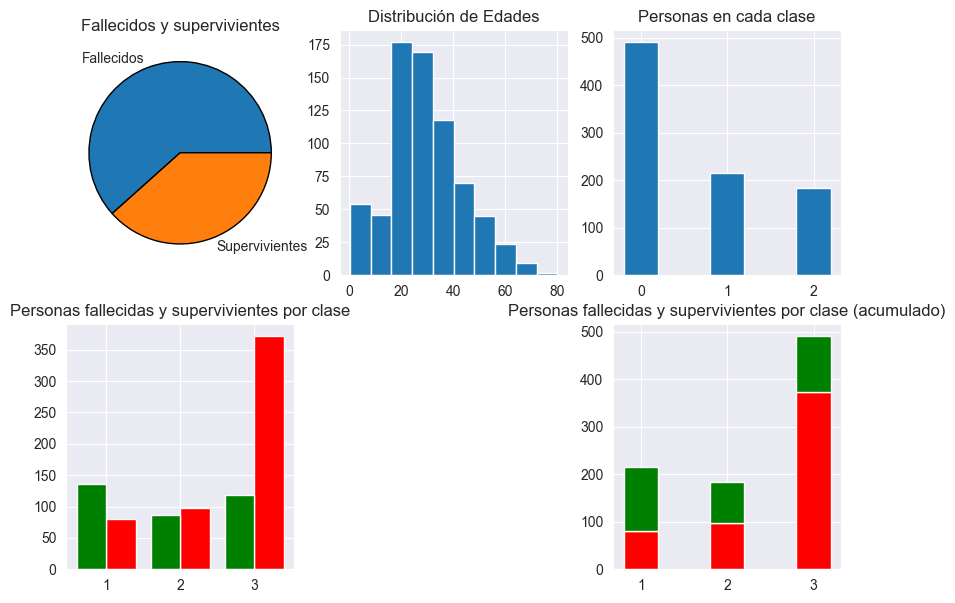

In [40]:
df = pd.read_csv("C:/Users/ESP/Desktop/ProgramacionIA/UD3/csvs/titanic.csv")
# diagrama de sectores 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

axes[0, 0].pie(df['Survived'].value_counts(), labels=['Fallecidos','Supervivientes'], wedgeprops={'edgecolor': 'black'})
axes[0, 0].set_title('Fallecidos y supervivientes')

# Histograma con las edades
axes[0, 1].hist(df["Age"], bins=10, edgecolor="white")
axes[0, 1].set_title('Distribución de Edades')

# Diagrama de barras con el número de personas en cada clase.
clases = df['Pclass'].value_counts()
axes[0, 2].bar(range(len(clases)), height=clases, edgecolor="white", width=0.4,)
axes[0, 2].set_title('Personas en cada clase')

# Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.
grouped = df.groupby(['Pclass', 'Survived']).size().unstack()
fallecidos = grouped[0]  
supervivientes = grouped[1]
clases = fallecidos.index 

axes[1, 0].bar(clases + 0.2, fallecidos, width=0.4, label='Fallecidos', color='red')
axes[1, 0].bar(clases - 0.2, supervivientes, width=0.4, label='Supervivientes', color='green')
axes[1, 0].set_title('Personas fallecidas y supervivientes por clase')
# desactiva la celda de las posiciones del axes
axes[1, 1].axis('off')

# Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.
grouped = df.groupby(['Pclass', 'Survived']).size().unstack()
fallecidos = grouped[0]  
supervivientes = grouped[1]  
clases = fallecidos.index 

axes[1, 2].bar(clases, fallecidos, width=0.4, label='Fallecidos', color='red')
axes[1, 2].bar(clases, supervivientes, bottom=fallecidos, width=0.4, label='Supervivientes', color='green')
axes[1, 2].set_title('Personas fallecidas y supervivientes por clase (acumulado)')


plt.show()

5) Durante el entrenamiento de una red neuronal, se registró la pérdida (loss) en cada 
una de las 50 épocas usadas. Simula estos valores usando una función exponencial 
decreciente. Representa la evolución de la pérdida en un gráfico de líneas y destaca 
la tendencia general. Se adjunta modelo de referencia de la exponencial decreciente, 
donde x es la época:
<p style="text-align: center;">𝑦(𝑥) = 𝑒−0.1·x</p>

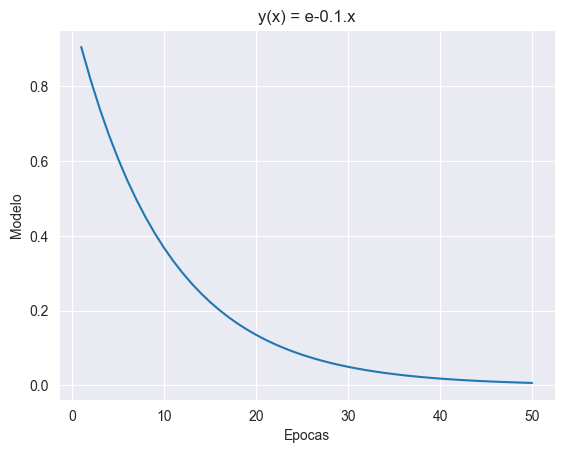

In [52]:
perdida = np.arange(1,51)
formula = np.power(math.e, -0.1*perdida)

plt.title(f'y(x) = e-0.1.x')
plt.xlabel('Epocas')
plt.ylabel("Modelo")
plt.plot(perdida, formula)
plt.show()